In [48]:
# Creating dataset and controling
from sklearn.datasets import make_circles
import pandas as pd
# Spliting datas into train_set and test_set
from sklearn.model_selection import train_test_split
# Creating Neural Network
from keras.optimizers import adam_v2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import MaxPool2D
from keras.layers import Flatten
# Plotting
import matplotlib.pyplot as plt
# Confusion matrix / Section 2
from keras.datasets import fashion_mnist
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

import tensorflow as ts
from tensorflow.keras.utils import to_categorical
import numpy as np

<span style="color:#B982ED ">Section 2</span>

In [49]:
(x_train, label_train), (x_test, label_test) = fashion_mnist.load_data()
label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

In [50]:
model = Sequential()
model.add(Dense(100, input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.25))
model.add(Dense(80, activation = 'relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.25))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

optimizer = adam_v2.Adam(learning_rate=0.3)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(x_train, label_train, epochs=10, batch_size=30)
_, accuracy_model = model.evaluate(x_train, label_train)
print('Accuracy: %.2f' % (accuracy_model*100))

Epoch 1/10
2000/2000 [==============================] - 72s 35ms/step - loss: 1.2780 - accuracy: 0.5939
Epoch 2/10
2000/2000 [==============================] - 74s 37ms/step - loss: 0.7281 - accuracy: 0.7238
Epoch 3/10
2000/2000 [==============================] - 79s 40ms/step - loss: 0.6217 - accuracy: 0.7695
Epoch 4/10
2000/2000 [==============================] - 78s 39ms/step - loss: 0.6056 - accuracy: 0.7757
Epoch 5/10
2000/2000 [==============================] - 79s 40ms/step - loss: 0.5946 - accuracy: 0.7790
Epoch 6/10
2000/2000 [==============================] - 79s 40ms/step - loss: 0.5790 - accuracy: 0.7847
Epoch 7/10
2000/2000 [==============================] - 78s 39ms/step - loss: 0.5683 - accuracy: 0.7884
Epoch 8/10
2000/2000 [==============================] - 78s 39ms/step - loss: 0.5562 - accuracy: 0.7939
Epoch 9/10
2000/2000 [==============================] - 78s 39ms/step - loss: 0.5516 - accuracy: 0.7952
Epoch 10/10
1875/1875 [==============================] - 25s 13m

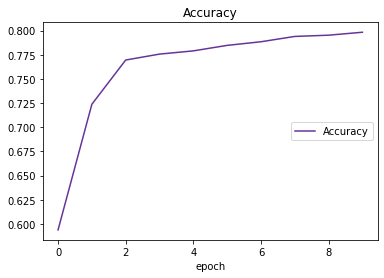

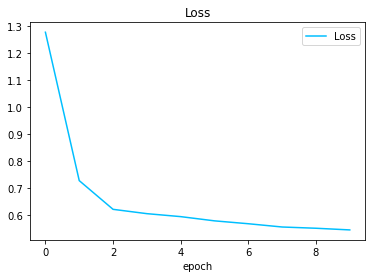

In [51]:
# For Accuracy
plt.plot(log.history['accuracy'], color='rebeccapurple', label='Accuracy')
# plt.plot(log.history['val_accuracy'], color='rebeccapurple', label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'center right')
plt.show()
# For Loss
plt.plot(log.history['loss'], color='deepskyblue', label='Loss')
# plt.plot(log.history['val_loss'], color='deepskyblue', label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [52]:
predictions = (model.predict(x_test))

count = 0 
for i in range(len(predictions)):
    count = count+1 if np.argmax(label_test[i]) == np.argmax(predictions[i]) else count + 0 
print(count/len(predictions)*100)

label = np.argmax(label_test, axis=1)
pre = np.argmax(predictions, axis=1)

80.07


In [53]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

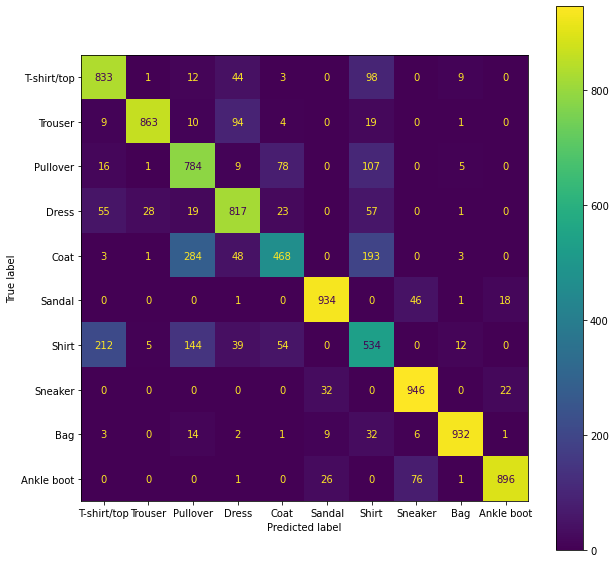

In [55]:
cm = confusion_matrix(label, pre)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

به صورت کلی میتوان گفت که مدل عملکرد خوبی دارد، اما نتوانسته است به درستی لباس های شبیه به هم را تشخیص دهد.